In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob
import time
from sklearn import svm, grid_search, datasets
from sklearn.preprocessing import StandardScaler
from skimage.feature import hog
from lesson_functions import *
from scipy.ndimage.measurements import label
from sklearn.model_selection import train_test_split
import pickle

/Users/SNAH/anaconda/envs/carnd-term1/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/SNAH/anaconda/envs/carnd-term1/lib/python3.5/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
# load a pe-trained svc model from a serialized (pickle) file
dist_pickle = pickle.load( open("svm_classifier.sav", "rb" ) )
print(dist_pickle)

# get attributes of our svc object
svc = dist_pickle["svc"]
X_scaler = dist_pickle["X_scaler"]

img = mpimg.imread('test_images/test3.jpg')

{'X_scaler': StandardScaler(copy=True, with_mean=True, with_std=True), 'svc': GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'gamma': [0.000244140625, 0.00048828125], 'C': [10, 20]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)}


In [3]:
ystart = 400
ystop = 656
scale = 1.5
# color_space = 'HSV' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
orient = 9  # HOG orientations
pix_per_cell = 8 # HOG pixels per cell
cell_per_block = 2 # HOG cells per block
# hog_channel = 'ALL' # Can be 0, 1, 2, or "ALL"
spatial_size = (16, 16) # Spatial binning dimensions
hist_bins = 16 

In [4]:
from collections import deque
history = deque(maxlen = 8)
print(len(history))

0


In [5]:
def process_img(img, plot = False):
    draw_img_1,heat_map_1 = find_cars(np.copy(img),svc,X_scaler,scale=1.5)
    
    draw_img_2,heat_map_2 = find_cars(np.copy(img),svc,X_scaler,scale=0.8)
    
    current_heatmap = heat_map_1+heat_map_2
    
    # Apply threshold to help remove false positives
    current_heatmap = apply_threshold(current_heatmap,threshold=1)
    
    # Visualize the heatmap when displaying
    current_heatmap = np.clip(current_heatmap, 0, 255)
    history.append(current_heatmap)
    
    heatmap = np.zeros_like(current_heatmap).astype(np.float)
    for heat in history:
        heatmap = heatmap + heat
    
    if len(history)>3:
        heatmap = apply_threshold(heatmap,threshold=2)
     # Find final boxes from heatmap using label function
    labels = label(heatmap)
    new_img = draw_labeled_bboxes(np.copy(img), labels)
    
    if(plot==True):
        fig = plt.figure(figsize=(20,8))
        plt.subplot(221)
        plt.imshow(draw_img_1)
        plt.title('Car Positions')
        plt.subplot(222)
        plt.imshow(heatmap, cmap='hot')
        plt.title('Heat Map')
        plt.subplot(223)
        plt.imshow(labels[0], cmap='gray')
        plt.title('Labels')
        plt.subplot(224)
        plt.imshow(new_img)
        plt.title('Car Positions')
        fig.tight_layout()
        plt.show()
    return new_img

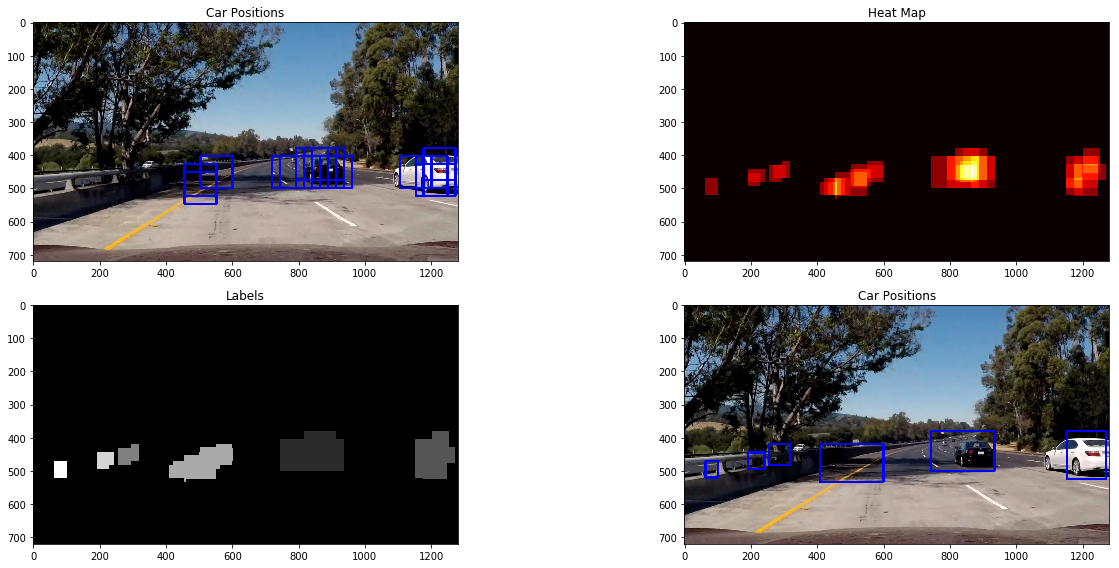

array([[[ 47,  53,  75],
        [ 38,  44,  56],
        [ 33,  38,  41],
        ..., 
        [ 76,  94,  80],
        [102, 119, 103],
        [145, 159, 142]],

       [[ 40,  45,  64],
        [ 27,  34,  44],
        [ 19,  25,  23],
        ..., 
        [  9,  27,  15],
        [ 21,  38,  22],
        [ 90, 104,  89]],

       [[ 35,  41,  53],
        [ 23,  28,  32],
        [ 18,  23,  16],
        ..., 
        [ 19,  37,  25],
        [  7,  23,  10],
        [ 14,  28,  13]],

       ..., 
       [[ 31,  36,  40],
        [ 51,  50,  55],
        [ 97,  88,  91],
        ..., 
        [121, 106, 103],
        [121, 106, 103],
        [124, 109, 106]],

       [[ 42,  47,  51],
        [ 29,  30,  34],
        [ 66,  60,  64],
        ..., 
        [130, 115, 112],
        [131, 116, 113],
        [135, 120, 117]],

       [[ 47,  52,  58],
        [ 36,  37,  42],
        [ 37,  31,  35],
        ..., 
        [137, 122, 119],
        [138, 123, 120],
        [141, 126,

In [24]:
img2 = mpimg.imread('test_images/test5.jpg')
process_img(img2,plot=True)

In [25]:
def process_test_imgs(dir):
    test_filenames = glob.glob(dir)
    print(test_filenames)
    for test_filename in test_filenames:
        test_image = mpimg.imread(test_filename)
        image = process_img(test_image,plot=False)
        
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        cv2.imwrite('output_images/'+test_filename.split('/')[-1], image)
        

In [7]:
test_dir = 'test_images/*.jpg'
process_test_imgs(test_dir)

['test_images/test6.jpg', 'test_images/test5.jpg', 'test_images/test4.jpg', 'test_images/test1.jpg', 'test_images/test3.jpg', 'test_images/test2.jpg']
x_scaler StandardScaler(copy=True, with_mean=True, with_std=True)
(276, 1280, 3)
(184, 853, 3)
x_scaler StandardScaler(copy=True, with_mean=True, with_std=True)
(276, 1280, 3)
(345, 1600, 3)
x_scaler StandardScaler(copy=True, with_mean=True, with_std=True)
(276, 1280, 3)
(184, 853, 3)
x_scaler StandardScaler(copy=True, with_mean=True, with_std=True)
(276, 1280, 3)
(345, 1600, 3)
x_scaler StandardScaler(copy=True, with_mean=True, with_std=True)
(276, 1280, 3)
(184, 853, 3)
x_scaler StandardScaler(copy=True, with_mean=True, with_std=True)
(276, 1280, 3)
(345, 1600, 3)
x_scaler StandardScaler(copy=True, with_mean=True, with_std=True)
(276, 1280, 3)
(184, 853, 3)
x_scaler StandardScaler(copy=True, with_mean=True, with_std=True)
(276, 1280, 3)
(345, 1600, 3)
x_scaler StandardScaler(copy=True, with_mean=True, with_std=True)
(276, 1280, 3)
(184

In [7]:
from moviepy.editor import VideoFileClip
def process_video(video_filename, plot=False):
    video_input = VideoFileClip(video_filename + ".mp4").subclip(19,25)
    video_output = video_input.fl_image(process_img)
    video_output.write_videofile(video_filename + "_output.mp4", audio=False)

In [39]:
history = deque(maxlen = 8)
process_video('test_video')

[MoviePy] >>>> Building video test_video_output.mp4
[MoviePy] Writing video test_video_output.mp4


 97%|█████████▋| 38/39 [17:24<00:26, 26.84s/it]


[MoviePy] Done.
[MoviePy] >>>> Video ready: test_video_output.mp4 



In [8]:
history = deque(maxlen = 6)
process_video('project_video')

[MoviePy] >>>> Building video project_video_output.mp4
[MoviePy] Writing video project_video_output.mp4


 99%|█████████▉| 150/151 [1:11:40<00:27, 27.55s/it]


[MoviePy] Done.
[MoviePy] >>>> Video ready: project_video_output.mp4 



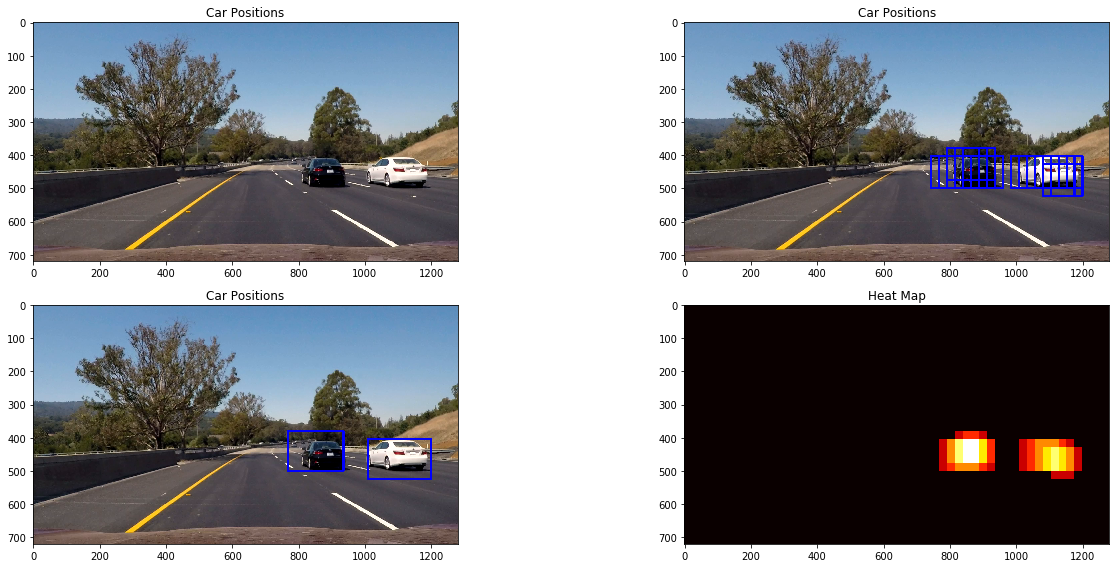

In [16]:
video_input = VideoFileClip('test_video.mp4')
video_output = video_input.fl_image(process_img)